## Multi Schema matching
Si tratta di matchare più di due schemi diversi sugli attributi, utilizzando Spacy e vedendo le colonne come frasi/testi

In [1]:
import Utilities
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
import seaborn as sns; sns.set_theme()
import pandasql as psql
pysqldf = lambda q: psql.sqldf(q, globals())

In [2]:
SOURCES={}
i=0
DF=pd.read_csv('movies/0imdb.csv',index_col=0).astype(str)
SOURCES[str(i)] = DF
i=i+1
DF=pd.read_csv('movies/1roger_ebert.csv',index_col=0).astype(str)
SOURCES[str(i)] = DF
i=i+1
DF=pd.read_csv('movies/2rotten_tomatoes.csv').astype(str)
SOURCES[str(i)] = DF
i=i+1
DF=pd.read_csv('movies/3rotten_tomatoes.csv',index_col=0).astype(str)
SOURCES[str(i)] = DF
i=i+1
DF=pd.read_csv('movies/4amazon.csv',index_col=0).astype(str)
SOURCES[str(i)] = DF
i=i+1
DF=pd.read_csv('movies/5imdb.csv',index_col=0).astype(str)
SOURCES[str(i)] = DF
i=i+1
DF=pd.read_csv('movies/6imdb.csv').astype(str)
SOURCES[str(i)] = DF


In [3]:
GS = pd.read_csv('movies/Movie_MTGS.csv').astype(str)
GS

,GAT,SOURCE,LAT,SLAT
0,Filming_Locations,2,Filming Locations,2_Filming Locations
1,RatingCount,2,RatingCount,2_RatingCount
2,ReviewCount,2,ReviewCount,2_ReviewCount
3,movie_country,2,Country,2_Country
4,movie_genre,0,genre,0_genre
...,...,...,...,...
66,movie_cost,4,cost,4_cost
67,movie_summary,2,Description,2_Description
68,movie_summary,3,Summary,3_Summary
69,movie_summary,5,Summary,5_Summary


In [4]:
#Campionamento degli attributi


In [5]:
#Trasformo il dizionario di DataFrame in un dizionario di SchemaDoc
SOURCES_sd = {}
nlp=spacy.load('en_core_web_lg')
for k,v in SOURCES.items(): # source & dataframe
    df = Utilities.sampleDF_clean(v, 400)

    SOURCES_sd[k] = Utilities.SchemaDoc(df, sep='. ', nlp=nlp, pre=False, verbose=True)
#Ottengo la SimilarityTable di ogni coppia e le appendo tutte insieme


Creation doc movie_name
Creation doc year
Creation doc directors
Creation doc actors
Creation doc movie_rating
Creation doc genre
Creation doc duration
Fine SchemaDoc
Creation doc movie_name
Creation doc year
Creation doc directors
Creation doc actors
Creation doc critic_rating
Creation doc genre
Creation doc pg_rating
Creation doc duration
Fine SchemaDoc
Creation doc Id
Creation doc Name
Creation doc Year
Creation doc Release Date
Creation doc Director
Creation doc Creator
Creation doc Actors
Creation doc Cast
Creation doc Language
Creation doc Country
Creation doc Duration
Creation doc RatingValue
Creation doc RatingCount
Creation doc ReviewCount
Creation doc Genre
Creation doc Filming Locations
Creation doc Description
Fine SchemaDoc
Creation doc Title
Creation doc Year
Creation doc Rating
Creation doc Director
Creation doc Creators
Creation doc Cast
Creation doc Genre
Creation doc Duration
Creation doc ContentRating
Creation doc Summary
Fine SchemaDoc
Creation doc title
Creation do

In [6]:
SOURCES_sd

{'0': ['movie_name', 'year', 'directors', 'actors', 'movie_rating', 'genre', 'duration'],
 '1': ['movie_name', 'year', 'directors', 'actors', 'critic_rating', 'genre', 'pg_rating', 'duration'],
 '2': ['Id', 'Name', 'Year', 'Release Date', 'Director', 'Creator', 'Actors', 'Cast', 'Language', 'Country', 'Duration', 'RatingValue', 'RatingCount', 'ReviewCount', 'Genre', 'Filming Locations', 'Description'],
 '3': ['Title', 'Year', 'Rating', 'Director', 'Creators', 'Cast', 'Genre', 'Duration', 'ContentRating', 'Summary'],
 '4': ['title', 'time', 'director', 'year', 'star', 'cost'],
 '5': ['Title', 'Year', 'Rating', 'Director', 'Creators', 'Cast', 'Genre', 'Duration', 'ContentRating', 'Summary'],
 '6': ['Id', 'Name', 'YearRange', 'ReleaseDate', 'Director', 'Creator', 'Cast', 'Duration', 'RatingValue', 'ContentRating', 'Genre', 'Url', 'Description']}

In [7]:
#crea la tabella dei match su tutti gli schemi, dove in seguito si applica la chiusura transitiva
MATCHES=pd.DataFrame(columns=['SOURCE_A', 'LAT_A', 'SOURCE_B', 'LAT_B', 'SLAT_A', 'SLAT_B','sim'])

for x in SOURCES_sd.keys():
    for y in SOURCES_sd.keys():
        if (x<y):
            #  print(x,y)
            MT= Utilities.similaritySchemadocs(SOURCES_sd[x], SOURCES_sd[y])
            MT.columns=['LAT_A','LAT_B','sim']
            MT['SOURCE_A']=x
            MT['SOURCE_B']=y
            MT['SLAT_A']=MT['SOURCE_A'] + '_' + MT['LAT_A']
            MT['SLAT_B']=MT['SOURCE_B'] + '_' + MT['LAT_B']
            MATCHES=MATCHES.append(MT, sort=True)
    
MATCHES=MATCHES[['SLAT_A','SLAT_B','sim']]

MATCHES

/home/matteo/Documents/SIWS/Utilities.py:195: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  PCC = DA.assign(key=1).merge(DB.assign(key=1), on='key').drop('key', 1)
/tmp/ipykernel_11117/725597764.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MATCHES=MATCHES.append(MT, sort=True)
/home/matteo/Documents/SIWS/Utilities.py:195: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  PCC = DA.assign(key=1).merge(DB.assign(key=1), on='key').drop('key', 1)
/tmp/ipykernel_11117/725597764.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MATCHES=MATCHES.append(MT, sort=True)
/home/matteo/Documents/SIWS/Utilities.py:195: FutureWarning: In a future v

,SLAT_A,SLAT_B,sim
0,0_movie_name,1_movie_name,0.990721
1,0_movie_name,1_year,0.788966
2,0_movie_name,1_directors,0.640416
3,0_movie_name,1_actors,0.473776
4,0_movie_name,1_critic_rating,0.555401
...,...,...,...
125,5_Summary,6_RatingValue,0.532477
126,5_Summary,6_ContentRating,0.751458
127,5_Summary,6_Genre,0.717066
128,5_Summary,6_Url,0.0


In [8]:
#crea una match table identica, ma utilizzando lo stable marriage nei confronti tra SchemaDoc

In [9]:
MATCHES

,SLAT_A,SLAT_B,sim
0,0_movie_name,1_movie_name,0.990721
1,0_movie_name,1_year,0.788966
2,0_movie_name,1_directors,0.640416
3,0_movie_name,1_actors,0.473776
4,0_movie_name,1_critic_rating,0.555401
...,...,...,...
125,5_Summary,6_RatingValue,0.532477
126,5_Summary,6_ContentRating,0.751458
127,5_Summary,6_Genre,0.717066
128,5_Summary,6_Url,0.0


In [10]:
pd.__version__

'1.4.2'

In [11]:
def toSimMatrix(SimTable):
    A_label = SimTable.columns[0]
    B_label = SimTable.columns[1]
    A_Colonne=SimTable[A_label].drop_duplicates().values.tolist()
    B_Righe=SimTable[B_label].drop_duplicates().values.tolist()
  
    SimMatrix = pd.DataFrame(np.nan,columns=A_Colonne, index=B_Righe)

    
    for i,col in enumerate(A_Colonne):
        for j,row in enumerate(B_Righe):
            s=SimTable[(SimTable[A_label]==col) &  (SimTable[B_label]==row)]['sim'].mean()

            SimMatrix.loc[row, col]=s

    SimMatrix.columns.name = 'A'
    SimMatrix.index.name = 'B'
    return SimMatrix

In [12]:
Utilities.toSimMatrix(MATCHES)

A,0_movie_name,0_year,0_directors,0_actors,0_movie_rating,0_genre,0_duration,1_movie_name,1_year,1_directors,...,5_Title,5_Year,5_Rating,5_Director,5_Creators,5_Cast,5_Genre,5_Duration,5_ContentRating,5_Summary
B,,,,,,,,,,,,,,,,,,,,,
1_movie_name,0.990721,0.665668,0.676215,0.550135,0.521268,0.764309,0.547681,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1_year,0.788966,0.817687,0.667302,0.439132,0.702462,0.651117,0.643666,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1_directors,0.640416,0.463887,0.986160,0.918792,0.350970,0.489323,0.378862,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1_actors,0.473776,0.269160,0.810053,0.979411,0.155048,0.515248,0.198915,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1_critic_rating,0.555401,0.633921,0.400129,0.235088,0.869103,0.446255,0.607925,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6_RatingValue,0.784808,0.818349,0.666790,0.438125,0.709737,0.648948,0.650039,0.781973,0.998588,0.611076,...,0.788367,0.503714,0.704956,0.609279,0.609566,0.573257,0.974977,0.650360,0.660653,0.532477
6_ContentRating,0.813246,0.639520,0.529396,0.454107,0.536023,0.798221,0.572578,0.814846,0.709169,0.490807,...,0.820485,0.461741,0.529302,0.481994,0.493190,0.468565,0.762037,0.571606,0.598756,0.751458
6_Genre,0.741829,0.567674,0.476738,0.512103,0.359032,0.922623,0.400575,0.753854,0.595915,0.471564,...,0.760245,0.384785,0.351899,0.452084,0.461856,0.442275,0.699774,0.399443,0.418681,0.717066


In [13]:
Utilities.toSimMatrix(MATCHES)

0 0 0_movie_name 1_movie_name
0 1 0_movie_name 1_year
0 2 0_movie_name 1_directors
0 3 0_movie_name 1_actors
0 4 0_movie_name 1_critic_rating
0 5 0_movie_name 1_genre
0 6 0_movie_name 1_pg_rating
0 7 0_movie_name 1_duration
0 8 0_movie_name 2_Id
0 9 0_movie_name 2_Name
0 10 0_movie_name 2_Year
0 11 0_movie_name 2_Release Date
0 12 0_movie_name 2_Director
0 13 0_movie_name 2_Creator
0 14 0_movie_name 2_Actors
0 15 0_movie_name 2_Cast
0 16 0_movie_name 2_Language
0 17 0_movie_name 2_Country
0 18 0_movie_name 2_Duration
0 19 0_movie_name 2_RatingValue
0 20 0_movie_name 2_RatingCount
0 21 0_movie_name 2_ReviewCount
0 22 0_movie_name 2_Genre
0 23 0_movie_name 2_Filming Locations
0 24 0_movie_name 2_Description
0 25 0_movie_name 3_Title
0 26 0_movie_name 3_Year
0 27 0_movie_name 3_Rating
0 28 0_movie_name 3_Director
0 29 0_movie_name 3_Creators
0 30 0_movie_name 3_Cast
0 31 0_movie_name 3_Genre
0 32 0_movie_name 3_Duration
0 33 0_movie_name 3_ContentRating
0 34 0_movie_name 3_Summary
0 35 0_

A,0_movie_name,0_year,0_directors,0_actors,0_movie_rating,0_genre,0_duration,1_movie_name,1_year,1_directors,...,5_Title,5_Year,5_Rating,5_Director,5_Creators,5_Cast,5_Genre,5_Duration,5_ContentRating,5_Summary
B,,,,,,,,,,,,,,,,,,,,,
1_movie_name,0.987531,0.665677,0.666081,0.549218,0.526542,0.768725,0.549144,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1_year,0.796834,0.817109,0.662682,0.436860,0.705181,0.648004,0.643911,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1_directors,0.656704,0.460704,0.981789,0.922660,0.347431,0.488361,0.376534,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1_actors,0.487146,0.269003,0.807177,0.979688,0.157875,0.513129,0.200701,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1_critic_rating,0.551828,0.629959,0.383629,0.231544,0.877107,0.441783,0.601687,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6_RatingValue,0.793220,0.817655,0.662006,0.436015,0.711866,0.646588,0.650239,0.788262,0.998776,0.605618,...,0.787109,0.505085,0.705902,0.615936,0.605485,0.577132,0.975889,0.649575,0.663667,0.533128
6_ContentRating,0.807832,0.630877,0.500669,0.443376,0.528227,0.796309,0.559273,0.816193,0.697831,0.478668,...,0.815127,0.460337,0.519606,0.480938,0.470818,0.450169,0.752230,0.558118,0.578119,0.760022
6_Genre,0.738751,0.569416,0.466786,0.509379,0.363182,0.925249,0.397736,0.758453,0.597780,0.477060,...,0.756269,0.381383,0.355320,0.468491,0.457342,0.437991,0.707928,0.396403,0.421429,0.711335


In [25]:
Utilities.toSimMatrix(MATCHES.query('sim > 0.6'))

A,0_movie_name,0_year,0_directors,0_actors,0_movie_rating,0_genre,0_duration,1_movie_name,1_year,1_directors,...,5_Title,5_Year,5_Rating,5_Director,5_Creators,5_Cast,5_Genre,5_Duration,5_ContentRating,5_Summary
B,,,,,,,,,,,,,,,,,,,,,
1_movie_name,0.991100,0.664943,0.675645,0.000000,0.000000,0.769162,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1_year,0.795899,0.817121,0.656874,0.000000,0.703932,0.649857,0.645312,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1_directors,0.641086,0.000000,0.986860,0.907642,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1_genre,0.748024,0.000000,0.000000,0.000000,0.000000,0.964662,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1_duration,0.629035,0.610488,0.000000,0.000000,0.000000,0.000000,0.896723,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6_Description,0.902380,0.000000,0.000000,0.000000,0.000000,0.770751,0.000000,0.919858,0.0,0.000000,...,0.926464,0.0,0.0,0.000000,0.000000,0.000000,0.622246,0.000000,0.0,0.990712
6_YearRange,0.000000,0.895717,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
6_Creator,0.000000,0.000000,0.909509,0.977164,0.000000,0.000000,0.000000,0.000000,0.0,0.938380,...,0.000000,0.0,0.0,0.937645,0.938919,0.928239,0.000000,0.000000,0.0,0.000000


/tmp/ipykernel_10571/3471615751.py:36: RuntimeWarning: Mean of empty slice.
  s=SimTable[(SimTable[A_label]==col) &  (SimTable[B_label]==row)]['sim'].values.mean()
/home/matteo/anaconda3/envs/data/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in long_scalars
  ret = ret / rcount


<AxesSubplot:xlabel='A', ylabel='B'>

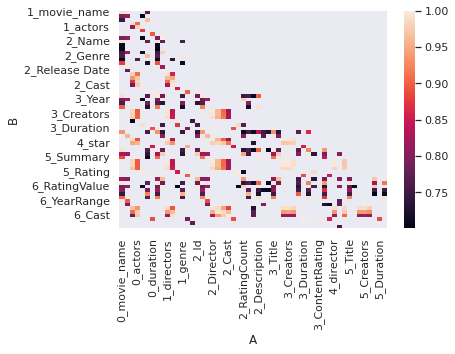

In [24]:
sns.heatmap(toSimMatrix1(MATCHES.query('sim > 0.7')))

In [18]:
#insieme di tutti i nodi collegati direttamente o indirettamente nel grafo
def ChiusuraRiflessivaTransitiva(MatchTable):
  def transitive_closure(a):
    closure = set(a)
    while True:
        new_relations = set((x,w) for x,y in closure for q,w in closure if q == y)
        closure_until_now = closure | new_relations
        if closure_until_now == closure:
            break
        closure = closure_until_now
    return closure

  SYMMETRIC=MatchTable[['B','A']]
  SYMMETRIC.rename(columns={'B':'A','A':'B'}, inplace=True)
  SYMMETRICMatchTable=MatchTable.append(SYMMETRIC)
  
  #SYMMETRIC_TRANSITIVE_CLOSURE=transitive_closure([(str(x[1]),str(x[0])) for x in SYMMETRICMatchTable.values.tolist()])
  SYMMETRIC_TRANSITIVE_CLOSURE=transitive_closure([(x[1],x[0]) for x in SYMMETRICMatchTable.values.tolist()])
  SYMMETRIC_TRANSITIVE_CLOSURE = pd.DataFrame(data=list(SYMMETRIC_TRANSITIVE_CLOSURE), 
                        columns=['A','B'])

  return SYMMETRIC_TRANSITIVE_CLOSURE

In [21]:
MATCHES

,SLAT_A,SLAT_B,sim
0,0_movie_name,1_movie_name,0.984347
1,0_movie_name,1_year,0.796936
2,0_movie_name,1_directors,0.617974
3,0_movie_name,1_actors,0.475009
4,0_movie_name,1_critic_rating,0.544295
...,...,...,...
125,5_Summary,6_RatingValue,0.528685
126,5_Summary,6_ContentRating,0.742026
127,5_Summary,6_Genre,0.714040
128,5_Summary,6_Url,0.000000


In [36]:
X=MATCHES.query('sim > 0.75')[['SLAT_A','SLAT_B']]
X.columns=['A','B']
ChiusuraRiflessivaTransitiva(X)

,A,B
0,6_Id,1_genre
1,2_Name,6_Id
2,6_RatingValue,6_RatingValue
3,2_Release Date,0_year
4,6_YearRange,2_Release Date
...,...,...
1749,6_YearRange,3_Year
1750,6_ReleaseDate,2_Description
1751,1_year,6_ReleaseDate
1752,2_RatingCount,2_RatingValue


In [37]:
def CalcoloDeiCluster(MT):
    Self=pd.merge(MT,MT, on=['A'])
    Group = MT.groupby('A', as_index=False)
    CLUSTERS=Group.agg({'B': np.max})
    CLUSTERS.columns=['ClusterElement','ClusterKey']
    CLUSTERS=CLUSTERS[['ClusterKey','ClusterElement']]

    return CLUSTERS

In [38]:
ClusterOttenuti= CalcoloDeiCluster(ChiusuraRiflessivaTransitiva(X))

# per concatenare mi servono delle stringhe, quindi

ClusterOttenuti = ClusterOttenuti.applymap(str)

def Aggregazione(x):    
      Campi = {
          'ClusterElement' :     x['ClusterElement'].str.cat(sep=', ')
          }
      return pd.Series(Campi)
    
  
ClusterOttenuti.groupby('ClusterKey').apply(Aggregazione)

,ClusterElement
ClusterKey,
5_ContentRating,"1_pg_rating, 3_ContentRating, 5_ContentRating"
6_Director,"0_actors, 0_directors, 1_actors, 1_directors, ..."
6_Duration,"0_duration, 1_duration, 2_Duration, 3_Duration..."
6_YearRange,"0_genre, 0_movie_name, 0_movie_rating, 0_year,..."


In [39]:
ClusterOttenuti

,ClusterKey,ClusterElement
0,6_Director,0_actors
1,6_Director,0_directors
2,6_Duration,0_duration
3,6_YearRange,0_genre
4,6_YearRange,0_movie_name
...,...,...
61,6_YearRange,6_Id
62,6_YearRange,6_Name
63,6_YearRange,6_RatingValue
64,6_YearRange,6_ReleaseDate


In [40]:
ClusterOttenuti.groupby('ClusterKey').apply(Aggregazione)


,ClusterElement
ClusterKey,
5_ContentRating,"1_pg_rating, 3_ContentRating, 5_ContentRating"
6_Director,"0_actors, 0_directors, 1_actors, 1_directors, ..."
6_Duration,"0_duration, 1_duration, 2_Duration, 3_Duration..."
6_YearRange,"0_genre, 0_movie_name, 0_movie_rating, 0_year,..."


## Con i dati di fotocamere Alaska

In [14]:
import pandas as pd
import numpy as np
import spacy

### Dati gold standard

In [15]:
gs = pd.read_csv('alaska_bench_beneventano/gold_standard_col.csv')
gs

,GAT,source,col
0,sensor_size,SOURCE#6,sensor format
1,sensor_size,SOURCE#6,sensor size
2,sensor_size,SOURCE#15,sensor size
3,sensor_size,SOURCE#21,sensor size
4,sensor_size,SOURCE#22,image sensor size
...,...,...,...
80,video_resolution,SOURCE#22,video resolutions
81,screen_size,SOURCE#6,lcd screen size
82,screen_size,SOURCE#15,screen size
83,screen_size,SOURCE#21,screen size inches


In [16]:
def col_to_table_GS(gs_col:pd.DataFrame,index='GAT', columns='source', values='col', col_index= ["SOURCE#6", "SOURCE#15", "SOURCE#21", "SOURCE#22", "SOURCE#24"], index_rows=['sensor_size','shutter_speed_range', 'image_resolution', 'zoom_optical','iso_sensitivity_range','iso_sensitivity_max','camera_dimension','camera_width','focal_length_range','video_resolution','screen_size']):
    return gs_col.pivot_table(index=index, columns=columns, values=values, aggfunc=lambda x: ', '.join(x)).reindex(col_index, axis=1).reindex(index_rows, axis=0)

In [17]:
col_to_table_GS(gs)

source,SOURCE#6,SOURCE#15,SOURCE#21,SOURCE#22,SOURCE#24
GAT,,,,,
sensor_size,"sensor format, sensor size",sensor size,sensor size,image sensor size,image sensor
shutter_speed_range,"minimum shutter speed, maximum shutter speed","max shutter speed, min shutter speed","shutter speed max, shutter speed min","camera shutter speed max, camera shutter speed...",NaN
image_resolution,"optical sensor resolution in megapixel, other ...","resolution, image resolutions","resolution, megapixels","megapixel, maximum image resolution, still ima...","effective pixels, number of effective pixels, ..."
zoom_optical,optical zoom,optical zoom,optical zoom x,optical zoom,lens
iso_sensitivity_range,iso rating,light sensitivity iso,"iso max, iso min","iso sensitivity, iso sensitivity min, iso sens...","iso sensitivity, iso sensitivity standard outp..."
iso_sensitivity_max,iso rating,light sensitivity iso,iso max,"iso sensitivity, iso sensitivity max","iso sensitivity, iso sensitivity standard outp..."
camera_dimension,dimensions,"width, height, depth",size,"width, depth, height","dimensions wxhxd, dimensions w x h x d"
camera_width,dimensions,width,size,width,"dimensions wxhxd, dimensions w x h x d"
focal_length_range,focal length,"focal length, focal length equivalent to 35mm","focal length wide, focal length tele","minimum focal length 35mm film equiv, focal le...",focal length


### Dati datasets

In [41]:
df6 = pd.read_csv('alaska_bench_beneventano/SOURCE#6.csv')
df15 = pd.read_csv('alaska_bench_beneventano/SOURCE#15.csv')
df21 = pd.read_csv('alaska_bench_beneventano/SOURCE#21.csv')
df22 = pd.read_csv('alaska_bench_beneventano/SOURCE#22.csv')
df24 = pd.read_csv('alaska_bench_beneventano/SOURCE#24.csv')

In [42]:
def df_to_str(df:pd.DataFrame):
    for c in df.columns:
        df[c] = df[c].astype(str)
    return df

def clean_df(df):
    return df_to_str(df.drop(['Unnamed: 0', 'JSON'], axis=1))

In [43]:
df6 = clean_df(df6)
df15 = clean_df(df15)
df21 = clean_df(df21)
df22 = clean_df(df22)
df24 = clean_df(df24)

In [44]:
gs[gs.source=='SOURCE#6'].col

0                              sensor format
1                                sensor size
6                      minimum shutter speed
7                      maximum shutter speed
14    optical sensor resolution in megapixel
15                          other resolution
26                              optical zoom
31                                iso rating
40                                iso rating
47                                dimensions
57                                dimensions
63                              focal length
72                          other resolution
73                  video display resolution
81                           lcd screen size
Name: col, dtype: object

In [45]:
source_names = [1,2,3,4]
a = ['a','b','c','d']
print(zip(source_names,a))
for x, y in zip(source_names,a):
    print(x,y)

1 a
2 b
3 c
4 d


In [46]:
def check_all_gold_attributes_are_in_data(gs:pd.DataFrame, *dfs)-> tuple:
    l = []
    source_names = list(gs.source.unique())
    for df, s in zip(dfs, source_names):    # occhio all'ordine dei nomi delle source!!
        l.append(all([c in df.columns for c in list(gs[gs.source==s].col)]))
    if all(l):
        return True, "All attributes are in data"
    return False, "Not all attributes are in data" 

In [47]:
check_all_gold_attributes_are_in_data(gs, df6, df15, df21, df22, df24)

(True, 'All attributes are in data')

In [48]:
df_to_str(df21).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   <page title>        147 non-null    object
 1   focal length tele   147 non-null    object
 2   focal length wide   147 non-null    object
 3   hd movie mode       147 non-null    object
 4   iso max             147 non-null    object
 5   iso min             147 non-null    object
 6   megapixels          147 non-null    object
 7   movie mode          147 non-null    object
 8   optical zoom x      147 non-null    object
 9   resolution          147 non-null    object
 10  screen size inches  147 non-null    object
 11  sensor size         147 non-null    object
 12  shutter speed max   147 non-null    object
 13  shutter speed min   147 non-null    object
 14  size                147 non-null    object
dtypes: object(15)
memory usage: 17.4+ KB


In [49]:
import spacy

SOURCES = {'SOURCE#6':df6, "SOURCE#15":df15, "SOURCE#21":df21, "SOURCE#22":df22, "SOURCE#24":df24}

In [50]:
#Trasformo il dizionario di DataFrame in un dizionario di SchemaDoc
SOURCES_sd = {}
nlp=spacy.load('en_core_web_lg')
for k,v in SOURCES.items(): # source & dataframe
    df = Utilities.sampleDF_clean(v, 400)

    SOURCES_sd[k] = Utilities.SchemaDoc(df, sep='. ', nlp=nlp, pre=False, verbose=True)
#Ottengo la SimilarityTable di ogni coppia e le appendo tutte insieme


Creation doc <page title>
Creation doc dimensions
Creation doc focal length
Creation doc iso rating
Creation doc lcd screen size
Creation doc maximum shutter speed
Creation doc minimum shutter speed
Creation doc optical sensor resolution in megapixel
Creation doc optical zoom
Creation doc other resolution
Creation doc sensor format
Creation doc sensor size
Creation doc video display resolution
Fine SchemaDoc
Creation doc <page title>
Creation doc depth
Creation doc focal length
Creation doc focal length equivalent to 35mm
Creation doc height
Creation doc image resolutions
Creation doc light sensitivity iso
Creation doc max shutter speed
Creation doc min shutter speed
Creation doc optical zoom
Creation doc resolution
Creation doc screen size
Creation doc sensor size
Creation doc video resolution
Creation doc width
Fine SchemaDoc
Creation doc <page title>
Creation doc focal length tele
Creation doc focal length wide
Creation doc hd movie mode
Creation doc iso max
Creation doc iso min
Cre

In [51]:
#Trasformo il dizionario di DataFrame in un dizionario di SchemaDoc
for k,v in SOURCES.items():
    df = Utilities.sampleDF_clean(v, 400)

    SOURCES_sd[k] = Utilities.SchemaDoc(df, sep='. ', nlp=nlp, pre=False, verbose=True)
#Ottengo la SimilarityTable di ogni coppia e le appendo tutte insieme


Creation doc <page title>
Creation doc dimensions
Creation doc focal length
Creation doc iso rating
Creation doc lcd screen size
Creation doc maximum shutter speed
Creation doc minimum shutter speed
Creation doc optical sensor resolution in megapixel
Creation doc optical zoom
Creation doc other resolution
Creation doc sensor format
Creation doc sensor size
Creation doc video display resolution
Fine SchemaDoc
Creation doc <page title>
Creation doc depth
Creation doc focal length
Creation doc focal length equivalent to 35mm
Creation doc height
Creation doc image resolutions
Creation doc light sensitivity iso
Creation doc max shutter speed
Creation doc min shutter speed
Creation doc optical zoom
Creation doc resolution
Creation doc screen size
Creation doc sensor size
Creation doc video resolution
Creation doc width
Fine SchemaDoc
Creation doc <page title>
Creation doc focal length tele
Creation doc focal length wide
Creation doc hd movie mode
Creation doc iso max
Creation doc iso min
Cre

In [53]:
SOURCES_sd['SOURCE#6']

['<page title>', 'dimensions', 'focal length', 'iso rating', 'lcd screen size', 'maximum shutter speed', 'minimum shutter speed', 'optical sensor resolution in megapixel', 'optical zoom', 'other resolution', 'sensor format', 'sensor size', 'video display resolution']

In [72]:
#crea la tabella dei match su tutti gli schemi, dove in seguito si applica la chiusura transitiva
MATCHES=pd.DataFrame(columns=['SOURCE_A', 'LAT_A', 'SOURCE_B', 'LAT_B', 'SLAT_A', 'SLAT_B','sim'])

for x in SOURCES_sd.keys():
    for y in SOURCES_sd.keys():
        if (x<y):
            #  print(x,y)
            MT= Utilities.similaritySchemadocs(SOURCES_sd[x], SOURCES_sd[y])
            MT.columns=['LAT_A','LAT_B','sim']
            MT['SOURCE_A']=x
            MT['SOURCE_B']=y
            MT['SLAT_A']=MT['SOURCE_A'] + '_' + MT['LAT_A']
            MT['SLAT_B']=MT['SOURCE_B'] + '_' + MT['LAT_B']
            #MATCHES=MATCHES.append(MT, sort=True)
            MATCHES = pd.concat([MATCHES, MT], sort=True).reset_index(drop=True)
    
MATCHES=MATCHES[['SLAT_A','SLAT_B','sim']]

MATCHES

/home/matteo/Documents/SIWS/Utilities.py:195: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  PCC = DA.assign(key=1).merge(DB.assign(key=1), on='key').drop('key', 1)
/home/matteo/Documents/SIWS/Utilities.py:195: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  PCC = DA.assign(key=1).merge(DB.assign(key=1), on='key').drop('key', 1)
/home/matteo/Documents/SIWS/Utilities.py:195: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  PCC = DA.assign(key=1).merge(DB.assign(key=1), on='key').drop('key', 1)
/home/matteo/Documents/SIWS/Utilities.py:195: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  PCC = DA.assign(key=1).merge(DB.assign(key=1), on='key').drop('k

,SLAT_A,SLAT_B,sim
0,SOURCE#15_<page title>,SOURCE#6_<page title>,0.830848
1,SOURCE#15_<page title>,SOURCE#6_dimensions,0.368571
2,SOURCE#15_<page title>,SOURCE#6_focal length,0.487746
3,SOURCE#15_<page title>,SOURCE#6_iso rating,0.703198
4,SOURCE#15_<page title>,SOURCE#6_lcd screen size,0.503402
...,...,...,...
2226,SOURCE#24_total pixels,SOURCE#6_optical zoom,0.79581
2227,SOURCE#24_total pixels,SOURCE#6_other resolution,0.486949
2228,SOURCE#24_total pixels,SOURCE#6_sensor format,0.92567
2229,SOURCE#24_total pixels,SOURCE#6_sensor size,0.85762


In [55]:
Utilities.toSimMatrix(MATCHES)

A,SOURCE#15_<page title>,SOURCE#15_depth,SOURCE#15_focal length,SOURCE#15_focal length equivalent to 35mm,SOURCE#15_height,SOURCE#15_image resolutions,SOURCE#15_light sensitivity iso,SOURCE#15_max shutter speed,SOURCE#15_min shutter speed,SOURCE#15_optical zoom,...,SOURCE#24_dimensions wxhxd,SOURCE#24_effective pixels,SOURCE#24_focal length,SOURCE#24_image sensor,SOURCE#24_iso sensitivity,SOURCE#24_iso sensitivity standard output sensitivity,SOURCE#24_lens,SOURCE#24_monitor,SOURCE#24_number of effective pixels,SOURCE#24_total pixels
B,,,,,,,,,,,,,,,,,,,,,
SOURCE#6_<page title>,0.830848,0.392391,0.338042,0.405776,0.358203,0.212694,0.355900,0.165194,0.497827,0.447199,...,0.351520,0.437198,0.497226,0.504683,0.655685,0.580504,0.532957,0.605404,0.387081,0.399287
SOURCE#6_dimensions,0.368571,0.755170,0.782627,0.755464,0.743287,0.527775,0.585341,0.271144,0.707684,0.740496,...,0.554405,0.617257,0.815807,0.702814,0.639552,0.687850,0.594499,0.756272,0.457651,0.482791
SOURCE#6_focal length,0.487746,0.907205,0.947034,0.937411,0.889669,0.522585,0.670484,0.327873,0.744145,0.776191,...,0.526913,0.663647,0.956345,0.766260,0.733102,0.747174,0.659508,0.838954,0.470412,0.495960
SOURCE#6_iso rating,0.703198,0.641055,0.644801,0.716956,0.623840,0.474542,0.739413,0.419700,0.726674,0.729283,...,0.493943,0.624447,0.781450,0.724161,0.980972,0.915586,0.678988,0.835768,0.507149,0.516997
SOURCE#6_lcd screen size,0.503402,0.772326,0.762346,0.716205,0.736920,0.367958,0.492108,0.335582,0.634219,0.615193,...,0.526145,0.685515,0.759339,0.745216,0.631199,0.623962,0.617112,0.785353,0.521621,0.550422
SOURCE#6_maximum shutter speed,0.323959,0.511519,0.442600,0.459609,0.503776,0.352652,0.384855,0.858690,0.486617,0.439670,...,0.610325,0.646726,0.521100,0.611522,0.570472,0.605049,0.606237,0.515376,0.591579,0.626677
SOURCE#6_minimum shutter speed,0.526794,0.726232,0.654605,0.706346,0.688971,0.416454,0.540575,0.570303,0.739873,0.692424,...,0.688287,0.783141,0.756512,0.774190,0.764477,0.772047,0.724566,0.762013,0.701140,0.718397
SOURCE#6_optical sensor resolution in megapixel,0.466977,0.613984,0.625988,0.563436,0.588332,0.334746,0.333769,0.455059,0.519867,0.548179,...,0.490464,0.723662,0.624793,0.726245,0.523486,0.509197,0.630057,0.621505,0.511842,0.601387
SOURCE#6_optical zoom,0.504200,0.574756,0.495742,0.509131,0.550100,0.359981,0.388067,0.504845,0.578604,0.605207,...,0.773061,0.807827,0.595646,0.761675,0.642417,0.668872,0.825316,0.660393,0.769138,0.795810


<AxesSubplot:xlabel='A', ylabel='B'>

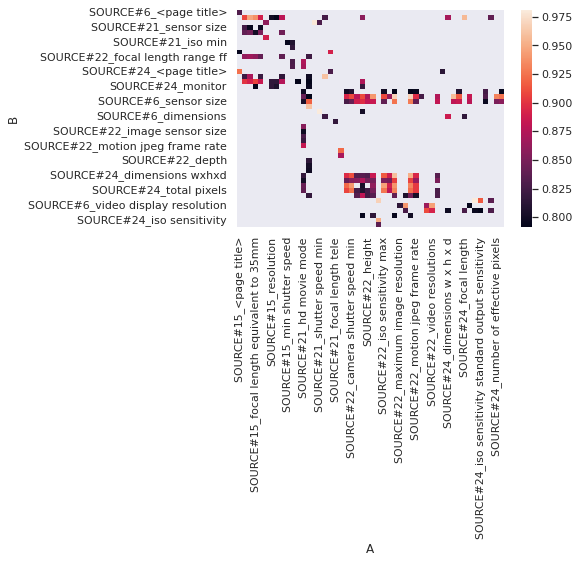

In [70]:
sns.heatmap(Utilities.toSimMatrix(MATCHES.query('sim > 0.79')))


In [61]:
#insieme di tutti i nodi collegati direttamente o indirettamente nel grafo
def ChiusuraRiflessivaTransitiva(MatchTable):
  def transitive_closure(a):
    closure = set(a)
    while True:
        new_relations = set((x,w) for x,y in closure for q,w in closure if q == y)
        closure_until_now = closure | new_relations
        if closure_until_now == closure:
            break
        closure = closure_until_now
    return closure

  SYMMETRIC=MatchTable[['B','A']]
  SYMMETRIC.rename(columns={'B':'A','A':'B'}, inplace=True)
  SYMMETRICMatchTable=MatchTable.append(SYMMETRIC)
  
  #SYMMETRIC_TRANSITIVE_CLOSURE=transitive_closure([(str(x[1]),str(x[0])) for x in SYMMETRICMatchTable.values.tolist()])
  SYMMETRIC_TRANSITIVE_CLOSURE=transitive_closure([(x[1],x[0]) for x in SYMMETRICMatchTable.values.tolist()])
  SYMMETRIC_TRANSITIVE_CLOSURE = pd.DataFrame(data=list(SYMMETRIC_TRANSITIVE_CLOSURE), 
                        columns=['A','B'])

  return SYMMETRIC_TRANSITIVE_CLOSURE

In [59]:
MATCHES

,SLAT_A,SLAT_B,sim
0,SOURCE#15_<page title>,SOURCE#6_<page title>,0.830848
1,SOURCE#15_<page title>,SOURCE#6_dimensions,0.368571
2,SOURCE#15_<page title>,SOURCE#6_focal length,0.487746
3,SOURCE#15_<page title>,SOURCE#6_iso rating,0.703198
4,SOURCE#15_<page title>,SOURCE#6_lcd screen size,0.503402
...,...,...,...
151,SOURCE#24_total pixels,SOURCE#6_optical zoom,0.79581
152,SOURCE#24_total pixels,SOURCE#6_other resolution,0.486949
153,SOURCE#24_total pixels,SOURCE#6_sensor format,0.92567
154,SOURCE#24_total pixels,SOURCE#6_sensor size,0.85762


In [65]:
X=MATCHES.query('sim > 0.74')[['SLAT_A','SLAT_B']]
X.columns=['A','B']
ChiusuraRiflessivaTransitiva(X)

/tmp/ipykernel_11117/3443301067.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SYMMETRICMatchTable=MatchTable.append(SYMMETRIC)


,A,B
0,SOURCE#21_sensor size,SOURCE#21_optical zoom x
1,SOURCE#24_total pixels,SOURCE#22_iso sensitivity max
2,SOURCE#22_iso sensitivity max,SOURCE#21_optical zoom x
3,SOURCE#22_maximum image resolution,SOURCE#22_motion jpeg frame rate
4,SOURCE#22_camera shutter speed max,SOURCE#15_screen size
...,...,...
4116,SOURCE#6_minimum shutter speed,SOURCE#22_iso sensitivity max
4117,SOURCE#24_dimensions wxhxd,SOURCE#21_size
4118,SOURCE#22_image sensor size,SOURCE#15_width
4119,SOURCE#15_screen size,SOURCE#22_iso sensitivity max


In [66]:
def CalcoloDeiCluster(MT):
    Self=pd.merge(MT,MT, on=['A'])
    Group = MT.groupby('A', as_index=False)
    CLUSTERS=Group.agg({'B': np.max})
    CLUSTERS.columns=['ClusterElement','ClusterKey']
    CLUSTERS=CLUSTERS[['ClusterKey','ClusterElement']]

    return CLUSTERS

In [68]:
ClusterOttenuti= CalcoloDeiCluster(ChiusuraRiflessivaTransitiva(X))

/tmp/ipykernel_11117/3443301067.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SYMMETRICMatchTable=MatchTable.append(SYMMETRIC)


In [69]:
ClusterOttenuti

,ClusterKey,ClusterElement
0,SOURCE#6_<page title>,SOURCE#15_<page title>
1,SOURCE#6_video display resolution,SOURCE#15_depth
2,SOURCE#6_video display resolution,SOURCE#15_focal length
3,SOURCE#6_video display resolution,SOURCE#15_focal length equivalent to 35mm
4,SOURCE#6_video display resolution,SOURCE#15_height
...,...,...
64,SOURCE#6_video display resolution,SOURCE#6_optical zoom
65,SOURCE#6_video display resolution,SOURCE#6_other resolution
66,SOURCE#6_video display resolution,SOURCE#6_sensor format
67,SOURCE#6_video display resolution,SOURCE#6_sensor size


In [67]:

# per concatenare mi servono delle stringhe, quindi

ClusterOttenuti = ClusterOttenuti.applymap(str)

def Aggregazione(x):    
      Campi = {
          'ClusterElement' :     x['ClusterElement'].str.cat(sep=', ')
          }
      return pd.Series(Campi)
    
  
ClusterOttenuti.groupby('ClusterKey').apply(Aggregazione)

/tmp/ipykernel_11117/3443301067.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SYMMETRICMatchTable=MatchTable.append(SYMMETRIC)


,ClusterElement
ClusterKey,
SOURCE#6_<page title>,"SOURCE#15_<page title>, SOURCE#21_<page title>..."
SOURCE#6_video display resolution,"SOURCE#15_depth, SOURCE#15_focal length, SOURC..."
